# Evaluation of Group Recommender System:

# RCSY Resit_project
### Mohammad Fayazi (i6222857)

In [1]:
import pandas as pd

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

print(movies.shape)
print(ratings.shape)

display(movies.head())
display(ratings.head())

(4633, 5)
(64438, 4)


,item,title,year,genres,plot
0,1,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things who pr...
1,2,jumanji,1995,Adventure|Children|Fantasy,"In 1869, near Brantford, New Hampshire, two br..."
2,3,grumpier old men,1995,Comedy|Romance,The feud between Max (Walter Matthau) and John...
3,4,waiting to exhale,1995,Comedy|Drama|Romance,"""Friends are the People who let you be yoursel..."
4,5,father of the bride part ii,1995,Comedy,The film begins five years after the events of...


,user,item,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,70,3.0,964982400
4,1,101,5.0,964980868


In [2]:
ratings = ratings[['user','item','rating']]
df = ratings.merge(movies, on='item')

print(df.shape)
display(df.head())

(64438, 7)


,user,item,rating,title,year,genres,plot
0,1,1,4.0,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things who pr...
1,5,1,4.0,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things who pr...
2,7,1,4.5,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things who pr...
3,15,1,2.5,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things who pr...
4,17,1,4.5,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things who pr...


## Preprocessing:

In [3]:
rating_per_item_df = df.groupby(['item']).count().sort_values(by="rating", ascending=False)

selected_items = list(rating_per_item_df.loc[rating_per_item_df['rating'] >= 10].reset_index()['item'])
selected_ratings_df = df.loc[df['item'].isin(selected_items)]

print(selected_ratings_df.shape)
display(selected_ratings_df.head())

df = selected_ratings_df[['user','item','rating','title','plot']]

print(df.columns)

(54474, 7)


,user,item,rating,title,year,genres,plot
0,1,1,4.0,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things who pr...
1,5,1,4.0,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things who pr...
2,7,1,4.5,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things who pr...
3,15,1,2.5,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things who pr...
4,17,1,4.5,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy,In a world where toys are living things who pr...


Index(['user', 'item', 'rating', 'title', 'plot'], dtype='object')


## Group Generations:

In [4]:
print(df['rating'].isna().any())
df['user'].nunique()

False


610

In [5]:
user_item_matrix = df.pivot(index='user', columns='item', values='rating')

user_item_matrix = user_item_matrix.fillna(0)
user_item_matrix_T = user_item_matrix.T

similarity_matrix = user_item_matrix_T.corr(method='pearson')

display(similarity_matrix)

user,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
user,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.015904,0.099016,0.128398,0.118348,0.067613,0.098268,0.082581,0.065690,-0.034890,...,0.016280,0.086280,0.210096,0.035259,0.110679,0.089991,0.213740,0.186542,0.090305,0.005585
2,0.015904,1.000000,-0.007573,-0.020335,-0.014046,-0.006079,0.016709,-0.014548,-0.010953,0.017457,...,0.215852,-0.024492,-0.026567,-0.020777,-0.028262,-0.026649,-0.027770,-0.003647,-0.011826,0.074704
3,0.099016,-0.007573,1.000000,-0.012293,0.004638,-0.011231,-0.017434,0.004380,-0.007885,-0.015286,...,0.001877,-0.003034,0.012235,-0.014958,0.015562,0.008762,0.042158,0.025661,-0.008513,-0.018687
4,0.128398,-0.020335,-0.012293,1.000000,0.052040,0.014509,0.051837,0.013855,-0.028508,0.007658,...,0.051983,0.068892,0.318497,-0.016800,0.035103,0.120756,0.054404,0.033136,-0.002401,-0.010151
5,0.118348,-0.014046,0.004638,0.052040,1.000000,0.349922,0.096532,0.451094,-0.014625,0.028770,...,0.037573,0.430046,0.104313,0.303972,0.209416,0.077696,0.184652,0.107641,0.305152,0.010923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.089991,-0.026649,0.008762,0.120756,0.077696,-0.029894,0.152569,0.069950,0.064153,0.057843,...,0.122354,0.037514,0.269669,-0.016138,0.097308,1.000000,0.053606,0.093395,0.080224,0.017217
607,0.213740,-0.027770,0.042158,0.054404,0.184652,0.138167,0.143848,0.198089,-0.003736,-0.039281,...,0.037778,0.171507,0.148385,0.098464,0.093078,0.053606,1.000000,0.156346,0.186256,0.022476
608,0.186542,-0.003647,0.025661,0.033136,0.107641,0.054170,0.283994,0.126573,0.064478,-0.033764,...,0.045873,0.085858,0.090086,0.080371,0.069744,0.093395,0.156346,1.000000,0.105481,0.118597


In [6]:
mean_corr = similarity_matrix.mean().mean()  
std_corr = similarity_matrix.std().std() 

print('Mean correlation: ', mean_corr)
print('Standard deviation of correlation: ', std_corr)


Mean correlation:  0.0719998825759432
Standard deviation of correlation:  0.029489477069659042


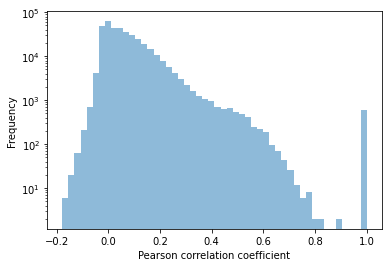

In [7]:
import matplotlib.pyplot as plt

plt.hist(similarity_matrix.values.flatten(), bins=50, alpha=0.5)
plt.xlabel('Pearson correlation coefficient')
plt.ylabel('Frequency')
plt.yscale("log")
plt.show()


In [8]:
similar_groups = []
dissimilar_groups = []
already_added_users = set()

for user in similarity_matrix.index:
    if user in already_added_users:
        continue

    similar_users = similarity_matrix[user][similarity_matrix[user] > 0.35].index.tolist()
    if len(similar_users) >= 4:
        group = [user for user in similar_users if user not in already_added_users][:4]
        if len(group) == 4:  
            similar_groups.append(group)
            already_added_users.update(group)

for user in similarity_matrix.index:
    if user in already_added_users:
        continue

    dissimilar_users = similarity_matrix[user][similarity_matrix[user] < 0.25].index.tolist()
    if len(dissimilar_users) >= 4:
        group = [user for user in dissimilar_users if user not in already_added_users][:4]
        if len(group) == 4:  
            dissimilar_groups.append(group)
            already_added_users.update(group)


display(similar_groups)
display(dissimilar_groups)

print(len(similar_groups))
print(len(dissimilar_groups))

[[5, 8, 26, 35],
 [6, 14, 38, 40],
 [11, 93, 126, 340],
 [16, 17, 23, 110],
 [18, 62, 63, 105],
 [19, 217, 294, 555],
 [21, 249, 292, 475],
 [25, 189, 209, 366],
 [31, 71, 270, 451],
 [32, 117, 150, 206],
 [37, 56, 81, 94],
 [43, 46, 54, 58],
 [44, 151, 277, 337],
 [45, 304, 330, 453],
 [57, 91, 202, 368],
 [64, 226, 307, 480],
 [65, 326, 378, 549],
 [15, 67, 231, 247],
 [72, 133, 178, 379],
 [79, 183, 494, 532],
 [84, 235, 372, 385],
 [99, 102, 107, 121],
 [106, 291, 466, 556],
 [109, 136, 142, 170],
 [120, 350, 456, 521],
 [130, 134, 145, 174],
 [131, 152, 343, 400],
 [59, 137, 168, 221],
 [144, 173, 229, 286],
 [114, 148, 154, 582],
 [156, 275, 387, 391],
 [162, 373, 404, 411],
 [96, 164, 303, 493],
 [166, 219, 220, 223],
 [176, 179, 192, 240],
 [181, 284, 314, 321],
 [184, 515, 550, 567],
 [182, 187, 405, 580],
 [191, 262, 386, 446],
 [68, 132, 200, 280],
 [214, 364, 389, 529],
 [233, 317, 433, 445],
 [28, 239, 354, 425],
 [242, 347, 353, 374],
 [243, 349, 395, 436],
 [215, 251, 29

[[2, 3, 4, 7],
 [1, 10, 12, 13],
 [9, 22, 24, 27],
 [20, 30, 33, 34],
 [29, 39, 41, 42],
 [36, 48, 49, 50],
 [47, 52, 53, 55],
 [51, 61, 66, 69],
 [60, 73, 74, 75],
 [70, 77, 78, 80],
 [76, 83, 85, 86],
 [82, 88, 89, 90],
 [87, 95, 97, 98],
 [92, 101, 103, 104],
 [100, 111, 112, 113],
 [108, 116, 118, 119],
 [115, 123, 124, 125],
 [122, 128, 129, 135],
 [127, 139, 140, 141],
 [138, 146, 147, 149],
 [143, 155, 157, 158],
 [153, 160, 161, 163],
 [159, 167, 169, 171],
 [165, 175, 177, 180],
 [172, 186, 188, 190],
 [185, 194, 195, 196],
 [193, 198, 199, 201],
 [197, 204, 205, 207],
 [203, 210, 211, 212],
 [208, 216, 218, 222],
 [213, 225, 227, 228],
 [224, 232, 234, 236],
 [230, 238, 241, 245],
 [237, 248, 250, 252],
 [246, 255, 256, 257],
 [253, 259, 260, 261],
 [258, 264, 265, 267],
 [263, 269, 271, 272],
 [268, 278, 279, 281],
 [276, 283, 285, 287],
 [282, 290, 293, 295],
 [289, 298, 299, 301],
 [297, 306, 308, 309],
 [305, 311, 312, 313],
 [310, 316, 318, 319],
 [315, 322, 324, 325],
 

60
92


In [9]:
def get_group_stats(group):
    
    corr_values = [similarity_matrix.loc[u1, u2] for i, u1 in enumerate(group) for u2 in group[i+1:]]

    return pd.Series(corr_values).mean(), pd.Series(corr_values).std()

for i, group in enumerate(similar_groups):
    mean_corr, std_corr = get_group_stats(group)
    print(f'Similar group {i+1}: Mean correlation = {mean_corr}, Std correlation = {std_corr}')


Similar group 1: Mean correlation = 0.3709981803639144, Std correlation = 0.08656914124496738
Similar group 2: Mean correlation = 0.41667307638435763, Std correlation = 0.06334635591723523
Similar group 3: Mean correlation = 0.4012590930759803, Std correlation = 0.12736992960223667
Similar group 4: Mean correlation = 0.35414746187397456, Std correlation = 0.07916104784693535
Similar group 5: Mean correlation = 0.3506036022566907, Std correlation = 0.04994294090989019
Similar group 6: Mean correlation = 0.3389400466164982, Std correlation = 0.025570675244436278
Similar group 7: Mean correlation = 0.32579330726117195, Std correlation = 0.057689173943653305
Similar group 8: Mean correlation = 0.3581502610966181, Std correlation = 0.0782215167070485
Similar group 9: Mean correlation = 0.4352753220741344, Std correlation = 0.11309379066875737
Similar group 10: Mean correlation = 0.34909134738126896, Std correlation = 0.1396917831738953
Similar group 11: Mean correlation = 0.5264964913973397

## Hold_Out Validation:

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

## Collaborative_Filtering RCSY:

#### This segment of the code has used the Collaborative filtering, demonstrated in lab1.  

In [11]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.user_knn import UserUser

num_recs = 200
user_user = UserUser(15, min_nbrs=3)  
recsys = Recommender.adapt(user_user)

train = train_df[['user', 'item', 'rating']]
recsys.fit(train)

Numba is using threading layer workqueue - consider TBB
BLAS using multiple threads - can cause oversubscription
found 2 potential runtime problems - see https://boi.st/lkpy-perf


In [12]:
selected_movies_useruser = recsys.recommend(5, 10)
selected_movies_useruser = selected_movies_useruser.join(df['title'], on='item')
display(selected_movies_useruser)

,item,score,title
0,1411,4.679767,stargate
1,106100,4.640315,NaN
2,176,4.623296,toy story
3,1178,4.553302,pulp fiction
4,5500,4.527523,back to the future
5,3683,4.517355,twister
6,1248,4.507945,pulp fiction
7,3451,4.469561,mission: impossible
8,94959,4.452184,NaN
9,2600,4.444456,schindler's list


In [13]:
user_item_pairs = test_df[['user', 'item']]
predicted_ratings = recsys.predict(user_item_pairs)

predicted_df = user_item_pairs.assign(predicted_rating=predicted_ratings.values)
print(predicted_df)

       user   item  predicted_rating
33873   555   1036          3.829289
47854   288   1287          3.978828
28344   292  63113          3.060498
36322    21  30793          3.288644
23389   352   2701          2.744555
...     ...    ...               ...
24152   448   4874          3.170039
18316   385     10          3.321566
27422   169   5620          3.906684
25237    63   6539          3.454961
55732   474   6879          3.602807

[10895 rows x 3 columns]


In [14]:
from lenskit.metrics.predict import rmse
from lenskit import batch, topn, util
from lenskit.metrics.topn import precision, recall

test_pairs = test_df[['user', 'item']]

# batch.predict() reference: https://lkpy.lenskit.org/en/stable/interfaces.html#lenskit.batch.predict
preds = batch.predict(recsys, test_pairs)

test_with_preds = test_df.merge(preds, how='left', on=['user', 'item'])

# rmse reference: https://recserver.lenskit.org/en/latest/accuracy.html
rmse_val = rmse(test_with_preds['prediction'], test_with_preds['rating'])
print(f'RMSE: {rmse_val}')

RMSE: 0.8533801526090168


In [15]:
users = test_df['user'].unique()
recs = batch.recommend(recsys, users, num_recs)
test_ratings = test_df.copy()
test_ratings['relevance'] = test_ratings['rating'] >= 3

# topn.RecListAnalysis reference: https://lkpy.readthedocs.io/en/stable/evaluation/topn-metrics.html
rla = topn.RecListAnalysis()
rla.add_metric(topn.precision)
rla.add_metric(topn.recall)

results = rla.compute(recs, test_ratings)
print('Precision: ', results['precision'].mean())
print('Recall: ', results['recall'].mean())

Precision:  0.02267827529021559
Recall:  0.25046041897513965


## Group Aggregation Strategy:

In [16]:
 def least_misery(group):
    
    user_recommendations = []

    for user in group:
        recs = recsys.recommend(user, num_recs)
        user_recommendations.append(set(recs['item'])) 

    common_items = set.intersection(*user_recommendations)
    
    min_scores = {}
    for item in common_items:
        min_score = min([user_item_matrix.loc[user, item] for user in group])
        min_scores[item] = min_score

    sorted_items = sorted(min_scores, key=min_scores.get, reverse=True)

    return sorted_items[:10]


In [17]:
similar_group_recs = [least_misery(group) for group in similar_groups]
print(similar_group_recs)
print(len(similar_group_recs))

[[3328, 4226, 6787, 1283, 1411, 3334, 5135, 912, 1041, 914], [4226, 6787, 899, 1287, 903, 1673, 905, 33660, 908, 3213], [1287, 904, 778, 5135, 912, 914, 4499, 1178, 28, 926], [3328, 1283, 1411, 4103, 1288, 1927, 1291, 3213, 2318, 5135], [1203, 1283, 1411, 3334, 1673, 910, 5135, 911, 1041, 55442], [122882, 4226, 6787, 1283, 3334, 4103, 1411, 1673, 904, 908], [6787, 1411, 1287, 1673, 905, 3213, 910, 5135, 1041, 1276], [1283, 1411, 3213, 910, 55442, 2067, 914, 3476, 1178, 926], [1283, 3334, 903, 1287, 904, 2186, 778, 905, 908, 910], [1283, 6787, 1411, 899, 904, 905, 33660, 908, 3213, 910], [1287, 904, 1673, 905, 98961, 1945, 2329, 1178, 28, 928], [4226, 6787, 1411, 899, 904, 905, 908, 3213, 910, 5135], [122882, 1283, 1411, 3334, 903, 904, 910, 5135, 527, 2959], [1283, 6787, 1411, 4103, 904, 905, 3213, 910, 5135, 1041], [122882, 33794, 4103, 55820, 5135, 1041, 28, 6711, 1084, 68157], [122882, 5135, 1041, 2067, 2076, 158238, 112175, 68157, 88129, 94], [1283, 905, 910, 911, 16, 914, 2067, 44

In [18]:
dissimilar_group_recs = [least_misery(group) for group in dissimilar_groups]

print(dissimilar_group_recs)
print(len(dissimilar_group_recs))

[[6, 904, 905, 1178, 923, 28, 926, 105504, 78499, 933], [1411, 904, 908, 914, 1945, 28, 926, 930, 78499, 933], [1283, 1411, 899, 904, 905, 908, 910, 527, 5135, 1041], [1283, 6787, 1028, 899, 905, 908, 5135, 3088, 4499, 1945], [3328, 4226, 1411, 910, 5135, 1041, 1178, 28, 926, 928], [1283, 6787, 1411, 6, 778, 5135, 16, 1041, 912, 2067], [], [1283, 1411, 33660, 904, 905, 908, 68237, 3213, 5135, 910], [1283, 1411, 902, 6, 3334, 904, 3213, 910, 5135, 2959], [1411, 903, 4499, 930, 933, 4011, 1199, 3504, 1845, 1086], [3328, 1283, 6787, 1411, 3334, 4103, 903, 1673, 3213, 910], [778, 3213, 55442, 2580, 1276, 1178, 923, 926, 800, 933], [1283, 1411, 3334, 6, 4103, 903, 910, 5135, 527, 1041], [46976, 1283, 1411, 899, 903, 1673, 905, 1178, 926, 928], [1283, 6787, 1411, 905, 908, 910, 5135, 1041, 55442, 1945], [4226, 902, 908, 3213, 910, 914, 2067, 4499, 918, 1945], [1283, 1411, 899, 1673, 3213, 910, 5135, 912, 1041, 914], [1283, 1411, 910, 5135, 16, 1041, 2067, 918, 1178, 928], [1411, 899, 904, 90

## Evaluation (nDCG):

#### This section has been debugged with the help of ChatGPT Refrence: https://openai.com/blog/chatgpt

In [19]:
import numpy as np

def ndcg(group_recommendations, group):
    actual = []
    for user in group:
        user_ratings = [user_item_matrix.loc[user, item] if item in user_item_matrix.columns else 0 for item in group_recommendations]
        actual.append(user_ratings)

    actual = np.array(actual)
    DCG = np.sum([np.sum(u_ratings / np.log2(np.arange(2, len(u_ratings) + 2))) for u_ratings in actual])

    ideal_ratings = np.sort(actual, axis=1)[:, ::-1]
    IDCG = np.sum([np.sum(u_ratings / np.log2(np.arange(2, len(u_ratings) + 2))) for u_ratings in ideal_ratings])

    if IDCG == 0:
        return 0
    else:
        return DCG / IDCG


In [20]:
similar_group_ndcgs = [ndcg(recs, group) for recs, group in zip(similar_group_recs, similar_groups)]
dissimilar_group_ndcgs = [ndcg(recs, group) for recs, group in zip(dissimilar_group_recs, dissimilar_groups)]

print('Similar nDCG: ' ,np.mean(similar_group_ndcgs))
print('Dissimilar nDCG: ',np.mean(dissimilar_group_ndcgs))


Similar nDCG:  0.12114857759700741
Dissimilar nDCG:  0.17035620111429273


#### The nDCG of 0.121 for the similar group indicates that the items that are highly relevant to the group members are not ranked very highly in the list of recommendations. This suggests that the recommender system might not be performing very well for this group.

#### For the dissimilar group, the nDCG of 0.17 is a bit higher than that for the similar group, but it's still relatively low.

#### These results might suggest that the "Least Misery" approach may not be the best fit for the dataset or groups, it also suggest that the user-user collaborative filtering algorithm is not capturing the preferences of the group members well.

#### The "Least Misery" strategy, aims to avoid items that any group member dislikes, but this might lead to recommendations that are merely acceptable to all members, rather than highly relevant. If the goal is to maximize relevance for all group members, another group recommendation strategy might perform better.